In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


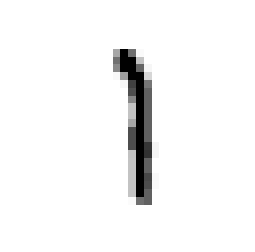

1.0


In [5]:
some_digit = X[12334]
some_digit_as_img = some_digit.reshape(28,28)

plt.imshow(some_digit_as_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()
print(y[12334])

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Index mischeln**  
Damit bei der Kreuzvalidierung sämtliche Mengen ähnlich sind, müssen die Index gemischelt werden.

In [7]:
import numpy as np

In [8]:
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binärer Klassifikator
Ein binärer Klassifikator kann genau **2 Kategorien** unterscheiden.

In unserem Beispiel **3 oder Nicht-3**

## Klassifikator für das stochastische Gradientenverfahren
Ein effizienter Klassifikator bei grossen Datensätzen, ausserdem geeignet für Online-Learning

In [9]:
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [10]:
from sklearn.linear_model import SGDClassifier

In [11]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict(X_train[:10])

array([False,  True, False, False, False, False, False, False, False,
       False])

# Qualitätsmasse bei Klassifikationen
Wir messen die Genauigkeit über die Kreuzvalidierung um das Problem beim Messen von Klassifikationen aufzuzeigen.  
Wie man sieht sind bei allen 6 durchläufen Genauigkeiten im Bereich 95% erzielt worden.  
Das Problem ist, das 90% der Datenpunkte Nicht-3 sind.
> Die **Genauigkeit** bei Klassifikatoren ist für gewöhnlich **nicht das empfehlenswerte Qualitätsmass**. Besonders dann nicht, wenn man es mit **unbalancierten Datensätzen** zu tun hat, sprich, Datensätze, bei denen manche Kategorien viel häufiger vorkommen als andere.  

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
# mit crossvalidation von sklearn
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring='accuracy')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/nb

array([0.96260187, 0.9528    , 0.96364818])

In [15]:
# eigene Implementierung der cross_validation
# die Folds sind in diesem Beispiel stratifiziert
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_3):
    clone_clf = clone(sgd_clf)
    
    # trainingsdaten
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_3[train_index]
    
    # validierungsdaten
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_3[test_index]
    
    # trainiere den klassifikator
    clone_clf.fit(X_train_folds, y_train_folds)
    
    # vorhersage treffen
    y_pred = clone_clf.predict(X_test_folds)
    
    # ergebniss berechnen
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9626018699065046


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9528


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9636481824091204


# Konfusionsmatrix
* 00 -> richtige Negative:
    * Wurden richtig als Nicht-3en Klassifieziert
* 01 -> falsche Negative:
    * Wurden falsch als Nicht-3en Klassifiziert
* 10 -> falsche Positive:
    * Wurden falsch als 3en Klassiifiziert
* 11 -> richtige Positive:
    * Wurden richtig als 3en Klassifiziert

In [16]:
from sklearn.model_selection import cross_val_predict

In [22]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/nb

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_train_3, y_train_pred)

array([[53243,   626],
       [ 1793,  4338]])

# Relevanz und Sensitivität (precision and recall)
Die Relevanz ist ein kompakteres Qualitätsmass welches die Genauigkeit der positiven Vorhersagen beschreibt.  
$Relevanz = \frac{RP}{RP + FP}$  
$RP =$ richtige Positive  
$FP =$ falsche Positive  

**Hohe Relevanz:**  
Verwirft viele gute Ergebnisse, aber zeigt bestimmt nur korrekte Ergebnisse an. Keine falschen Positiven, viele falsche Negative.  
**Hohe Sensitivität:**  
Umgekehrt. Keine falschen Negativen, viele falsche Positive. Verfehlt keine Positiven.  

$Sensitivität = \frac{RP}{RP + FN}$  
$FN =$ falsche Negative  

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_train_3, y_train_pred)

0.8738920225624497

In [27]:
recall_score(y_train_3, y_train_pred)

0.7075517860055456

# $F_1$-Score
Mit diesem lassen sich zwei Klassifikatoren miteinander vergleichen.  
Er rechnet mit dem harmonischen Mittelwert, welchen auch niedrigen Mittelwerten ein hohes Gewicht verleiht.  
Der $F_1$-Score stellt zudem die Relevanz und die Sensitivität ins Verhältnis zueinander.

Achtung: Der $F_1$-Score begünstigt Klassifikatoren mit ähnlicher Relevanz und Sensitivität.

> Ein Erhöhen der Relevanz senkt die Sensitivität und umgekehrt. Dies nennt man auch die **Wechselbeziehung zwischen Relevanz und Sensitivität**.

# Wechselbeziehung zwischen Relevanz und Sensitivität

In [32]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-38295.07386675])

In [33]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [38]:
threshold = -40000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [39]:
# berechnung aller scores
y_scores = cross_val_predict(sgd_clf,
                             X_train,
                             y_train_3,
                             cv=3,
                             method='decision_function')
y_scores

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/nb

array([-137860.67312187,  312643.22251679, -129358.23026288, ...,
       -606135.82065203, -863696.31696056, -708380.95010219])

In [40]:
# anzeige der relevanz und sensitivität anhand jedes berrechneten schwellwerts
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

In [93]:
# plotten
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(15,6))
    ax.plot(thresholds, precisions[:-1], 'b--', label='Relevanz')
    ax.plot(thresholds, recalls[:-1], 'g-', label='Sensitivität')
    
    ax.set_xlabel('Schwellenwert')
    ax.legend(loc='center left')
    ax.set_ylim([-0.01,1.01])
    ax.set_xlim([thresholds.min(), thresholds.max()])
    ax.grid()

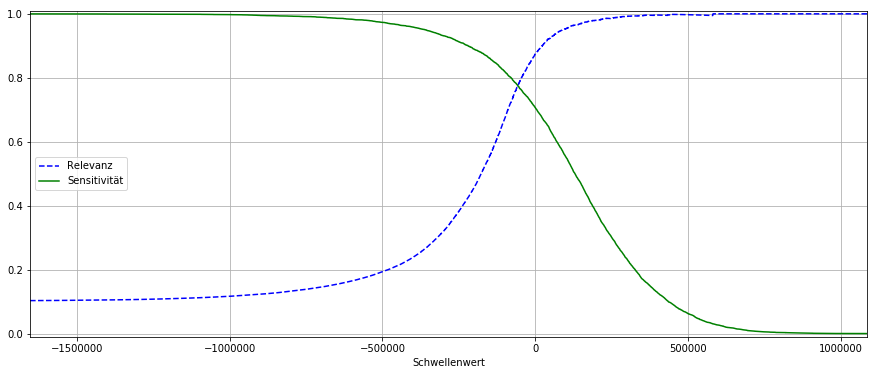

In [94]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [137]:
# relevanz gegen sensitivität
def plot_precision_vs_recall(precisions, recalls):
    fig, ax = plt.subplots(figsize=(9,7))
    ax.plot(recalls, precisions, 'g-', label='Relevanz vs. Sensitibität')
    
    major_ticks = np.arange(0, 1.2, 0.2)
    minor_ticks = np.arange(0, 1.05, 0.05)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    
    ax.set_xlabel('Sensitivität')
    ax.set_ylabel('Relevanz')
    ax.legend(loc='center left')
    ax.grid(which='major', alpha=0.5)
    ax.grid(which='minor', alpha=0.2)
    ax.set_title('Verhältniss')

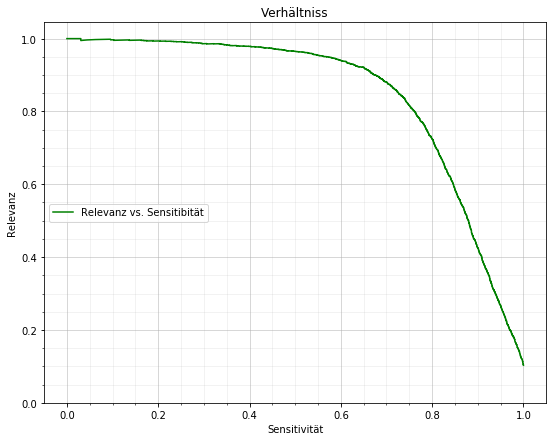

In [138]:
plot_precision_vs_recall(precisions, recalls)

In [152]:
# klassifiktator mit schwellewert bei 70'000 -> relevanz von 90% und sensitivität von 70%
y_train_pred_90 = (y_scores > 20000)

In [153]:
precision_score(y_train_3, y_train_pred_90)

0.8972425678586816

In [154]:
recall_score(y_train_3, y_train_pred_90)

0.6793345294405481